[Econ 142] Alex Sewon Kim 26481817 

Production Analysis

In [2]:

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as pp
import statsmodels . api as sm
import seaborn as sns


/Users/Alex/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Location of maf_firm.out file
data = "/Users/Alex/Desktop/Research/SAT/created_data/"
col_dtypes = {"Y" :float, "K" :float, "naics_4digit":int, \
"VA" :float , "L" :float , "M" :float , "i" :float, \
"year" :int , "gvkey" :int}

df = pd.read_csv("/Users/Alex/Desktop/mf_firms.out.txt", dtype = col_dtypes, \
na_values="", engine="c", sep = "\t", encoding = "utf−8")


Problem #1


In [4]:
df['naics_4digit_str'] = df['naics_4digit'].astype(str)
df['naics_4digit_str'] = df['naics_4digit_str'].str[0:2]
indicator_31_32_33 = df['naics_4digit_str'].isin(['31','32','33'])
df_31_32_33= df[indicator_31_32_33]

In [5]:
df.groupby("gvkey").size() #3897distinct firsm#

gvkey
1013      13
1021      11
1034      10
1050      14
1056       8
1072      16
1078      14
1099       2
1104      15
1115       2
1117      17
1161      17
1173      17
1209      17
1235       1
1239      13
1244       7
1260       1
1278       2
1281       5
1283       7
1297       2
1300      17
1327      16
1331       7
1356      16
1359       3
1372       6
1397      14
1408      16
          ..
196159     2
196160     2
197759     1
210032     1
233491     6
253527     8
254096    11
260086     2
260408     6
260737     6
260919     1
264265    11
264270     7
264414    11
264416    11
264629     3
264668     4
264713    10
266316     7
271987     1
272699     7
274165     6
275264     1
277918    14
282553     4
284041     3
284722     1
287462     5
311524     1
315318     1
Length: 3897, dtype: int64

In [6]:
df14 =df[df['year']==2014]

In [7]:
df14

,gvkey,year,gvkey.1,year.1,Y,K,L,M,VA,i,naics_4digit,naics_4digit_str
47,1050,2014,1050,2014,242.782036,34.842984,0.853,160.397790,82.384246,1.065701,3334,33
71,1072,2014,1072,2014,1444.400192,2033.063657,10.700,558.888923,885.511269,40.342829,3344,33
85,1078,2014,1078,2014,16812.535291,12870.000000,77.000,9070.023583,7742.511708,977.003674,3254,32
102,1104,2014,1104,2014,100.047588,16.650763,0.303,73.477221,26.570367,1.906629,3322,33
121,1117,2014,1117,2014,31.627912,5.821448,0.101,21.340670,10.287242,0.643381,3342,33
138,1161,2014,1161,2014,5622.785250,1834.114746,9.687,4715.900747,906.884503,87.691768,3344,33
155,1173,2014,1173,2014,31.678972,14.675357,0.199,16.508661,15.170311,0.719996,3345,33
172,1209,2014,1209,2014,8668.249909,22351.816881,21.200,5433.378284,3234.871625,1527.826915,3251,32
227,1300,2014,1300,2014,37945.058462,16508.922521,127.000,23493.295174,14451.763288,1015.360342,3364,33
243,1327,2014,1327,2014,2340.103959,853.776069,5.550,1274.555722,1065.548237,192.552661,3344,33


In [8]:
sum(df14.Y)

4598885.1656160457

In [9]:
sum(df14.L)

10561.920999999991

In [10]:
dfs = df14.describe(percentiles=[.05, .25, .75, .95])
dfs

,gvkey,year,gvkey.1,year.1,Y,K,L,M,VA,i,naics_4digit
count,1385.000000,1385.0,1385.000000,1385.0,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,69109.449097,2014.0,69109.449097,2014.0,3320.494704,2231.672204,7.625936,2322.643726,997.850979,177.861325,3291.880144
std,71760.882757,0.0,71760.882757,0.0,13757.130624,17611.446735,21.993221,10755.259635,3571.361717,1339.764645,67.206223
min,1050.000000,2014.0,1050.000000,2014.0,0.015777,0.043616,0.011000,0.076002,-360.548975,0.000000,3111.000000
5%,3068.200000,2014.0,3068.200000,2014.0,2.381021,1.307091,0.031000,6.797117,-29.356203,0.064936,3121.000000
25%,10618.000000,2014.0,10618.000000,2014.0,39.397880,14.930594,0.152000,37.964972,5.014818,1.025990,3254.000000
50%,27776.000000,2014.0,27776.000000,2014.0,335.954781,125.984336,0.994000,211.207990,98.070600,10.953641,3329.000000
75%,141846.000000,2014.0,141846.000000,2014.0,1824.290514,856.879813,5.607000,1162.113794,603.964913,63.954279,3344.000000
95%,185342.000000,2014.0,185342.000000,2014.0,13011.277576,6869.959647,34.968000,8127.425641,4573.565433,542.736655,3363.000000
max,315318.000000,2014.0,315318.000000,2014.0,259274.554682,525470.728374,302.000000,219383.525866,67969.396362,32894.516806,3379.000000


In [11]:
#calculate the number of firm-year observations left
print('total count',len(df_31_32_33))  

#calculate the number of distinct firms
distinct_firms=df_31_32_33.groupby("gvkey").size()
print('number of distinct firms',len(distinct_firms))

#calculate the number of aggregate total sales and workers
df2=df_31_32_33[df_31_32_33["year"]==2014]
print('total sales',np.sum(df14.Y)) 
print('total workers',np.sum(df14.L)) 
df14.sum(axis=0)

# Make a list of containing the names of the relevant variables
share=['Y','K','L','M','i']
# calculate the percentiles of total sales, capital stock, employees, materials, investment
df14[share].describe(percentiles=[0.25,0.5,0.75,0.95])

total count 29836
number of distinct firms 3897
total sales 4598885.165616046
total workers 10561.920999999991


,Y,K,L,M,i
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,3320.494704,2231.672204,7.625936,2322.643726,177.861325
std,13757.130624,17611.446735,21.993221,10755.259635,1339.764645
min,0.015777,0.043616,0.011000,0.076002,0.000000
25%,39.397880,14.930594,0.152000,37.964972,1.025990
50%,335.954781,125.984336,0.994000,211.207990,10.953641
75%,1824.290514,856.879813,5.607000,1162.113794,63.954279
95%,13011.277576,6869.959647,34.968000,8127.425641,542.736655
max,259274.554682,525470.728374,302.000000,219383.525866,32894.516806


Considering every elements Y,K,L,M,i, high standard deviation values for each elements. Also 50% values are less than mean, on average roughly 10 times, We can infer that the distributions of each values are right skewed based on the summary statistics, which there exist outlier firms that pulls its mean (#note difference between 95% value and max value is huge). Thus, Manufacturing industry heavily depends on the large firms. 
(interesting questions that we may ask in further, this might have a sense for barriers to entry) 

Problem #2

In [12]:
lnK = np.log(df14['K'])
lnL = np.log(df14['L'])
lnM = np.log(df14['M'])
lnY = np.log(df14['Y'])
df14['lnK']=lnK
df14['lnL']=lnL
df14['lnM']=lnM
df14['lnY']=lnY
df14['constant']=1

In [13]:
df14['lnK']=lnK
df14['lnL']=lnL
df14['lnM']=lnM
df14['lnY']=lnY
df14['constant']=1

/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [14]:
Y = df14['lnY']
X = df14[['constant','lnK','lnL','lnM']]
X

,constant,lnK,lnL,lnM
47,1,3.550852,-0.158996,5.077657
71,1,7.617299,2.370244,6.325951
85,1,9.462654,4.343805,9.112730
102,1,2.812456,-1.194022,4.296975
121,1,1.761549,-2.292635,3.060615
138,1,7.514317,2.270785,8.458695
155,1,2.686170,-1.614450,2.803885
172,1,10.014663,3.054001,8.600316
227,1,9.711656,4.844187,10.064470
243,1,6.749669,1.713798,7.150353


In [15]:
result1 = sm.OLS(Y,X).fit(cov_type="HC0")
result1.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x1082e8400>>

In [16]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnY   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     3987.
Date:                Mon, 26 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:38:48   Log-Likelihood:                -1659.1
No. Observations:                1385   AIC:                             3326.
Df Residuals:                    1381   BIC:                             3347.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant       2.0005      0.143     13.991      0.000       1.720       2.281
lnK            0.1589      0.029      5.504      0.000       0.102       0.215
lnL            0.4859      0.031     15.575      0.000       0.425       0.547
lnM            0.5132      0.035     14.524      0.000       0.444       0.582
==============================================================================
Omnibus:                      888.611   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11588.718
Skew:                          -2.817   Prob(JB):                         0.00
Kurtosis:                      16.003   Cond. No.                         53.7
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""


Regression Results:

$\alpha = 0.1586$ 

$\beta = 0.4859$ 

$\gamma = 0.5132$

($\alpha, \beta, \gamma$)% change in the output induced by 1% change in (K,L,M) holding other variables constant

In [17]:
coef1= result1.params
cov1 = result1.cov_params()

print (coef1)
print ('\n')
print (cov1)
print ('\n')

#Hyptohesis Testing
t = (sum(result1.params[1:4])-1)/np.sqrt(cov1['lnK'][1]+cov1['lnL'][2]+cov1['lnM'][3]+2*(cov1['lnL'][1]+cov1['lnM'][1]+cov1['lnM'][2]))
SD_sum = np.sqrt(cov1['lnK'][1]+cov1['lnL'][2]+cov1['lnM'][3]+2*(cov1['lnL'][1]+cov1['lnM'][1]+cov1['lnM'][2]))

print (t)
print(SD_sum)

constant    2.000468
lnK         0.158893
lnL         0.485932
lnM         0.513235
dtype: float64


          constant       lnK       lnL       lnM
constant  0.020445 -0.000625  0.003948 -0.003299
lnK      -0.000625  0.000833 -0.000200 -0.000656
lnL       0.003948 -0.000200  0.000973 -0.000608
lnM      -0.003299 -0.000656 -0.000608  0.001249


14.0297113153
0.0112661138345


In [18]:
hypotheses = '(lnK+lnL+lnM=1)'
t_test = result1.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.1581      0.011     14.030      0.000       1.136       1.180


Given our function $Y=AK^{\alpha}L^{\beta}M^{\gamma}$ 

we try to estimate the elasticity of output with respect to capital and labor using a simple OLS regression.

Which is $log(y)=log(A)+\alpha log(K)+\beta log(L)+\gamma log(M)$ where A is the unobservable productivity of the firm that we are interested in.

We define 
$\epsilon = log(A)-E[log(A)]$ so that we can assume its mean equal to zero. Then, our estimating function will estimates $E^{*}[log(Y)|log(K),log(L),log(M)]$, and our coefficients will be the estimates for elasticities in the sample. 

- return to scale: : the sum of $\hat{\alpha}$ and $\hat{\beta}$ and $\hat{\gamma}$ will give us information about, if equal to one we will have constant return to scale.
${H_0}= 1 $ 

    Distribution of the t-statstics calculated above, also T-test, both manually and with the code, $t = 14.03$, which approximately follow normal distribution. Its p value is 0 thus we can reject the null hyptothesis of constant returns to scale.



- Consistency of Coefficient Estimate for Y elasticity: Since A, Productivity measure of the firm, is unobserved, and if A corellates with K,L,M OLS estimate will be bias due to the omitted variables. Thus, estimate would not be consisitent in this case. For instance we can think of the technological level of the firm, Company with high technology will produce more output which will over estimate the coefficient of $\hat{\alpha}$ and $\hat{\beta}$ and $\hat{\gamma}$ of the OLS. 

In [19]:
df14

,gvkey,year,gvkey.1,year.1,Y,K,L,M,VA,i,naics_4digit,naics_4digit_str,lnK,lnL,lnM,lnY,constant
47,1050,2014,1050,2014,242.782036,34.842984,0.853,160.397790,82.384246,1.065701,3334,33,3.550852,-0.158996,5.077657,5.492164,1
71,1072,2014,1072,2014,1444.400192,2033.063657,10.700,558.888923,885.511269,40.342829,3344,33,7.617299,2.370244,6.325951,7.275449,1
85,1078,2014,1078,2014,16812.535291,12870.000000,77.000,9070.023583,7742.511708,977.003674,3254,32,9.462654,4.343805,9.112730,9.729880,1
102,1104,2014,1104,2014,100.047588,16.650763,0.303,73.477221,26.570367,1.906629,3322,33,2.812456,-1.194022,4.296975,4.605646,1
121,1117,2014,1117,2014,31.627912,5.821448,0.101,21.340670,10.287242,0.643381,3342,33,1.761549,-2.292635,3.060615,3.454040,1
138,1161,2014,1161,2014,5622.785250,1834.114746,9.687,4715.900747,906.884503,87.691768,3344,33,7.514317,2.270785,8.458695,8.634582,1
155,1173,2014,1173,2014,31.678972,14.675357,0.199,16.508661,15.170311,0.719996,3345,33,2.686170,-1.614450,2.803885,3.455653,1
172,1209,2014,1209,2014,8668.249909,22351.816881,21.200,5433.378284,3234.871625,1527.826915,3251,32,10.014663,3.054001,8.600316,9.067422,1
227,1300,2014,1300,2014,37945.058462,16508.922521,127.000,23493.295174,14451.763288,1015.360342,3364,33,9.711656,4.844187,10.064470,10.543895,1
243,1327,2014,1327,2014,2340.103959,853.776069,5.550,1274.555722,1065.548237,192.552661,3344,33,6.749669,1.713798,7.150353,7.757951,1


In [21]:
included_pairs = sorted ( df14 [ 'naics_4digit' ] . unique ())
pair_dums = pd.get_dummies(df14['naics_4digit'].astype('category'), prefix='naics')
dum_X = pd.concat ([ df14, pair_dums ] , axis=1)
df14
X_dum = pd.concat([X,pair_dums.iloc[:,0:-1]],axis=1)

result2 = sm.OLS(Y,X_dum).fit(cov_type="HC0")
result2.summary


<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x1c0e8e0828>>

In [22]:
pair_dums

,naics_3111,naics_3112,naics_3113,naics_3114,naics_3115,naics_3116,naics_3118,naics_3119,naics_3121,naics_3122,...,naics_3361,naics_3362,naics_3363,naics_3364,naics_3365,naics_3366,naics_3369,naics_3371,naics_3372,naics_3379
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
result2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnY   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                -6.969e+16
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               1.00
Time:                        17:01:08   Log-Likelihood:                -1571.7
No. Observations:                1385   AIC:                             3307.
Df Residuals:                    1303   BIC:                             3737.
Df Model:                          81                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant       1.9240      0.200      9.628      0.000       1.532       2.316
lnK            0.1405      0.032      4.412      0.000       0.078       0.203
lnL            0.4528      0.035     12.986      0.000       0.384       0.521
lnM            0.5388      0.036     14.826      0.000       0.468       0.610
naics_3111    -0.0801      0.110     -0.731      0.465      -0.295       0.135
naics_3112     0.0167      0.157      0.106      0.916      -0.291       0.325
naics_3113     0.1755      0.196      0.897      0.370      -0.208       0.559
naics_3114     0.1271      0.136      0.936      0.349      -0.139       0.393
naics_3115     0.3641      0.193      1.889      0.059      -0.014       0.742
naics_3116    -0.1595      0.133     -1.202      0.229      -0.419       0.100
naics_3118    -0.0988      0.114     -0.869      0.385      -0.322       0.124
naics_3119     0.0185      0.167      0.110      0.912      -0.310       0.347
naics_3121     0.3076      0.137      2.248      0.025       0.039       0.576
naics_3122     0.4875      0.182      2.682      0.007       0.131       0.844
naics_3131    -0.1640      0.121     -1.356      0.175      -0.401       0.073
naics_3132     0.2061      0.231      0.893      0.372      -0.246       0.659
naics_3141    -0.0107      0.163     -0.065      0.948      -0.331       0.309
naics_3151     0.1335      0.126      1.059      0.289      -0.114       0.380
naics_3152    -0.0324      0.122     -0.266      0.790      -0.271       0.206
naics_3159     0.4428      0.118      3.751      0.000       0.211       0.674
naics_3162     0.0377      0.124      0.303      0.762      -0.206       0.281
naics_3169     0.5013      0.313      1.602      0.109      -0.112       1.114
naics_3211    -0.3412      0.469     -0.728      0.467      -1.260       0.578
naics_3212     0.0671      0.153      0.439      0.660      -0.232       0.366
naics_3219     0.1345      0.124      1.083      0.279      -0.109       0.378
naics_3221    -0.0310      0.129     -0.240      0.811      -0.285       0.223
naics_3222    -0.1132      0.130     -0.868      0.385      -0.369       0.142
naics_3231     0.0114      0.130      0.088      0.930      -0.244       0.267
naics_3241     0.4693      0.157      2.988      0.003       0.162       0.777
naics_3251     0.1885      0.165      1.146      0.252      -0.134       0.511
naics_3252     0.0959      0.151      0.633      0.526      -0.201       0.393
naics_3253     0.2258      0.204      1.105      0.269      -0.175       0.626
naics_3254    -0.4723      0.135     -3.486      0.000      -0.738      -0.207
naics_3255     0.0970      0.167      0.579      0.562      -0.231       0.425
naics_3256     0.2204      0.143      1.544      0.123      -0.059       0.500
naics_3259    -0.1584      0.242     -0.656      0.512      -0.632       0.315
na

Regression Results:

$\alpha = 0.1405$ 

$\beta = 0.4528$ 

$\gamma = 0.5388$

($\alpha, \beta, \gamma$)% change in the output induced by 1% change in K,L,M holding other variables constant

The coefficient of dummy variables in the regression means that the percentage of the outputs contributed from each sector in particular which one firm belonging to a certain sector has a ceteris paribus,with other conditions remaining the same, effect of *value of coefficient*% change on 1%change Y.



In [104]:
hypotheses = '(lnK+lnL+lnM=1)'
t_test = result2.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.1321      0.011     12.563      0.000       1.111       1.153


Analogous to the first regression for 1.2     

- return to scale: : the sum of $\hat{\alpha}$ and $\hat{\beta}$ and $\hat{\gamma}$ will give us information about, if equal to one we will have constant return to scale.
${H_0}= 1 $ 

    Distribution of the t-statstics calculated, also T-test with the code above, $t = 12.563$, which approximately follow normal distribution. Its p value is 0 thus we can reject the null hyptothesis of constant returns to scale.
    
    
- Consistency of Coefficient Estimate for Y elasticity: Since A, Productivity measure of the firm, is unobserved, and if A corellates with K,L,M, and Sector indicators. OLS estimate will be bias due to the omitted variables. Thus, estimate would not be consisitent in this case. For instance we can think of the technological level of the firm, Company with high technology will produce more output which will over estimate the coefficient of $\hat{\alpha}$ and $\hat{\beta}$ and $\hat{\gamma}$ of the OLS. 


Problem #3


In [105]:
df1314 =df[df['year']>=2013]

In [106]:
lnK1 = np.log(df1314['K'])
lnL1 = np.log(df1314['L'])
lnM1 = np.log(df1314['M'])
lnY1 = np.log(df1314['Y'])
df1314['lnK']=lnK1
df1314['lnL']=lnL1
df1314['lnM']=lnM1
df1314['lnY']=lnY1
df1314['constant']=1
df1314

/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

,gvkey,year,gvkey.1,year.1,Y,K,L,M,VA,i,naics_4digit,naics_4digit_str,lnK,lnL,lnM,lnY,constant
46,1050,2013,1050,2013,184.918233,16.236777,0.783,116.049983,68.868250,1.296683,3334,33,2.787279,-0.244623,4.754021,5.219914,1
47,1050,2014,1050,2014,242.782036,34.842984,0.853,160.397790,82.384246,1.065701,3334,33,3.550852,-0.158996,5.077657,5.492164,1
70,1072,2013,1072,2013,1585.233591,1971.243363,10.800,577.475328,1007.758263,46.177310,3344,33,7.586420,2.379546,6.358666,7.368487,1
71,1072,2014,1072,2014,1444.400192,2033.063657,10.700,558.888923,885.511269,40.342829,3344,33,7.617299,2.370244,6.325951,7.275449,1
84,1078,2013,1078,2013,18269.697122,18833.963822,69.000,11070.662118,7199.035004,1062.004359,3254,32,9.843417,4.234107,9.312054,9.812999,1
85,1078,2014,1078,2014,16812.535291,12870.000000,77.000,9070.023583,7742.511708,977.003674,3254,32,9.462654,4.343805,9.112730,9.729880,1
101,1104,2013,1104,2013,84.367318,12.543715,0.180,67.336605,17.030713,4.361412,3322,33,2.529220,-1.714798,4.209704,4.435180,1
102,1104,2014,1104,2014,100.047588,16.650763,0.303,73.477221,26.570367,1.906629,3322,33,2.812456,-1.194022,4.296975,4.605646,1
120,1117,2013,1117,2013,27.722153,5.547110,0.087,19.072125,8.650028,0.317228,3342,33,1.713277,-2.441847,2.948228,3.322232,1
121,1117,2014,1117,2014,31.627912,5.821448,0.101,21.340670,10.287242,0.643381,3342,33,1.761549,-2.292635,3.060615,3.454040,1


In [107]:
diff=df1314.groupby('gvkey').diff()

In [108]:
df1314f = diff.dropna()
df1314f

,year,gvkey.1,year.1,Y,K,L,M,VA,i,naics_4digit,lnK,lnL,lnM,lnY,constant
47,1.0,0.0,1.0,57.863804,18.606207,0.070,44.347807,13.515996,-0.230982,0.0,0.763573,0.085627,0.323636,0.272250,0.0
71,1.0,0.0,1.0,-140.833399,61.820294,-0.100,-18.586405,-122.246994,-5.834481,0.0,0.030879,-0.009302,-0.032715,-0.093038,0.0
85,1.0,0.0,1.0,-1457.161831,-5963.963822,8.000,-2000.638535,543.476704,-85.000685,0.0,-0.380763,0.109699,-0.199324,-0.083119,0.0
102,1.0,0.0,1.0,15.680269,4.107048,0.123,6.140616,9.539654,-2.454783,0.0,0.283236,0.520776,0.087271,0.170466,0.0
121,1.0,0.0,1.0,3.905759,0.274338,0.014,2.268545,1.637214,0.326153,0.0,0.048272,0.149212,0.112387,0.131808,0.0
138,1.0,0.0,1.0,186.686848,-468.458780,-0.984,196.952309,-10.265461,8.854061,0.0,-0.227465,-0.096745,0.042661,0.033766,0.0
155,1.0,0.0,1.0,1.305965,1.259844,0.000,0.540235,0.765730,-0.282370,0.0,0.089758,0.000000,0.033272,0.042099,0.0
172,1.0,0.0,1.0,155.213266,1698.082976,-0.400,43.703239,111.510027,114.108972,0.0,0.079011,-0.018692,0.008076,0.018068,0.0
227,1.0,0.0,1.0,767.170048,457.420375,-4.000,746.160028,21.010021,121.576247,0.0,0.028099,-0.031010,0.032276,0.020425,0.0
243,1.0,0.0,1.0,501.740431,70.415225,0.800,202.759522,298.980909,76.360898,0.0,0.086076,0.155653,0.173262,0.241320,0.0


1489 - 1270 = 219   firm got dropeed 

In [109]:
df1314f['Constant'] = 1

/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
Yd = df1314f['lnY']
Xd = df1314f[['Constant','lnK','lnL','lnM']]

resultd = sm.OLS(Yd,Xd).fit(cov_type="HC0")
resultd.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnY   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     25.58
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           4.55e-16
Time:                        17:01:12   Log-Likelihood:                -654.15
No. Observations:                1270   AIC:                             1316.
Df Residuals:                    1266   BIC:                             1337.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       0.0270      0.010      2.657      0.008       0.007       0.047
lnK           -0.0035      0.054     -0.065      0.948      -0.110       0.103
lnL            0.4212      0.134      3.148      0.002       0.159       0.683
lnM            0.5185      0.074      7.018      0.000       0.374       0.663
==============================================================================
Omnibus:                     1393.059   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           289316.900
Skew:                           4.949   Prob(JB):                         0.00
Kurtosis:                      76.276   Cond. No.                         5.01
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Regression Results:

$\alpha = -0.0035$ 

$\beta = 0.4212$ 

$\gamma = 0.5185$

($\alpha, \beta, \gamma$)% change (growth rate) in the output induced by 1% change (growth rate) in K,L,M holding other variables constant 

In [111]:
hypotheses = '(lnK+lnL+lnM=1)'
t_test = resultd.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.9361      0.138     -0.462      0.644       0.665       1.207


- return to scale: : the sum of $\hat{\alpha}$ and $\hat{\beta}$ and $\hat{\gamma}$ will give us information about, if equal to one we will have constant return to scale.
${H_0}= 1 $ 

    Distribution of the t-statstics calculated, also T-test with the code above, $t = -0.462$, which approximately follow normal distribution. Its p value is 0.644 thus we are fail to reject the null hyptothesis of constant returns to scale.

The regression formula we are using in first difference is: $\Delta log Y_t=c_t+\alpha \Delta logK_t +\beta \Delta logL_t +\gamma \Delta logM_t + \Delta\epsilon^*_t$, where $\Delta log Y_t=log Y_t - logY_{t-1}$ (and so are $\Delta logK_t$,$\Delta logL_t$,$\Delta logL_t$), and $\Delta\epsilon^*_t$ is the difference between $\epsilon_{t}$ and $\epsilon_{t-1}$.

The Coefficient estimates are the underlyting output elasticities, and the coeficient estimates are relatively consistent under Kaldor's assumption, where $\alpha$ and $\beta$are constant. Using First Difference we are, as a matter of fact, assuming that all elasticities of a output with respect to our factors are constant over time.

However, following the work of Picketty, the coefficient estimates are relatively unconsistent. As argued in Picketty's study, an increase in income inequlality and the decrease in labor's share of income suggest a possible decrease of $\alpha$ over time simoutaneous with increase $\beta$, which there might exsit the factors that varies overtime that the first differnce regression under Kaldor's assumptin does not take into account. 

Another fundamental assumption is, no endogenous bias which the covariance between each ($\Delta log Y_t$, $\Delta X_t$) and $\epsilon^*_t$ is zero where $\epsilon$ is defined as following, $\epsilon = log(A)-E[log(A)]$. This is a less stright assumption than the cross sectional previous estimation, as argued in the study of Olley and Pakes, the model may have serial correlation of order one between errors.

The variables those are constant in the first difference regression, the omitted factors under assumption, do not vary across year would be drop out since the regression difference out the omitted variable which is constant across time, this is the major difference from the cross sectional analysis based on 2014 data alone. 

*The consistency of coefficient estimates varies under different assumption. I believe Picketty's assumption is more close to unbias estimates since the magnitude of omitted factor that varies overtime due to certain shocks might be large. 

In [112]:
pair_dumsd = pd.get_dummies(df1314['naics_4digit'].astype('category'), prefix='naics')
X_dum1 = pd.concat([Xd,pair_dumsd.iloc[:,0:-1]],axis=1).dropna()
X_dum1

,Constant,lnK,lnL,lnM,naics_3111,naics_3112,naics_3113,naics_3114,naics_3115,naics_3116,...,naics_3359,naics_3361,naics_3362,naics_3363,naics_3364,naics_3365,naics_3366,naics_3369,naics_3371,naics_3372
47,1.0,0.763573,0.085627,0.323636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,1.0,0.030879,-0.009302,-0.032715,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,1.0,-0.380763,0.109699,-0.199324,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,1.0,0.283236,0.520776,0.087271,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,1.0,0.048272,0.149212,0.112387,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,1.0,-0.227465,-0.096745,0.042661,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,1.0,0.089758,0.000000,0.033272,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,1.0,0.079011,-0.018692,0.008076,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,1.0,0.028099,-0.031010,0.032276,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
243,1.0,0.086076,0.155653,0.173262,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
resultd1 = sm.OLS(Yd,X_dum1).fit(cov_type="HC0")
resultd1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnY   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                -1.337e+14
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               1.00
Time:                        17:01:13   Log-Likelihood:                -640.53
No. Observations:                1270   AIC:                             1445.
Df Residuals:                    1188   BIC:                             1867.
Df Model:                          81                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       0.0294      0.019      1.568      0.117      -0.007       0.066
lnK           -0.0172      0.056     -0.310      0.757      -0.126       0.092
lnL            0.4143      0.137      3.019      0.003       0.145       0.683
lnM            0.4794      0.073      6.602      0.000       0.337       0.622
naics_3111    -0.0123      0.020     -0.618      0.537      -0.051       0.027
naics_3112    -0.1074      0.024     -4.493      0.000      -0.154      -0.061
naics_3113    -0.0819      0.030     -2.721      0.007      -0.141      -0.023
naics_3114    -0.0002      0.021     -0.010      0.992      -0.042       0.042
naics_3115    -0.0182      0.088     -0.206      0.836      -0.191       0.154
naics_3116     0.0030      0.022      0.134      0.894      -0.040       0.046
naics_3118    -0.0318      0.022     -1.425      0.154      -0.076       0.012
naics_3119    -0.0861      0.055     -1.554      0.120      -0.195       0.022
naics_3121    -0.0296      0.025     -1.162      0.245      -0.079       0.020
naics_3122    -0.0114      0.056     -0.202      0.840      -0.122       0.099
naics_3131    -0.0435      0.021     -2.028      0.043      -0.086      -0.001
naics_3132    -0.0303      0.023     -1.298      0.194      -0.076       0.015
naics_3141     0.0700      0.096      0.728      0.467      -0.119       0.259
naics_3151     0.0253      0.085      0.297      0.767      -0.142       0.193
naics_3152    -0.0339      0.018     -1.900      0.057      -0.069       0.001
naics_3159    -0.0579      0.021     -2.768      0.006      -0.099      -0.017
naics_3162    -0.0221      0.023     -0.962      0.336      -0.067       0.023
naics_3169    -0.0386      0.023     -1.712      0.087      -0.083       0.006
naics_3211    -0.4738      0.332     -1.427      0.154      -1.125       0.177
naics_3212    -0.0342      0.046     -0.740      0.459      -0.125       0.056
naics_3219    -0.0286      0.016     -1.742      0.082      -0.061       0.004
naics_3221    -0.0006      0.026     -0.023      0.982      -0.051       0.050
naics_3222    -0.0002      0.024     -0.009      0.993      -0.046       0.046
naics_3231    -0.0170      0.021     -0.806      0.420      -0.058       0.024
naics_3241     0.1514      0.125      1.207      0.228      -0.094       0.397
naics_3251     0.0108      0.046      0.238      0.812      -0.079       0.100
naics_3252    -0.0407      0.022     -1.849      0.064      -0.084       0.002
naics_3253    -0.1308      0.051     -2.549      0.011      -0.231      -0.030
naics_3254     0.0958      0.058      1.639      0.101      -0.019       0.210
naics_3255    -0.0626      0.043     -1.470      0.142      -0.146       0.021
naics_3256     0.0216      0.035      0.616      0.538      -0.047       0.090
naics_3259    -0.0959      0.054     -1.783      0.075      -0.201       0.010
na

Regression Results:

$\alpha$ = -0.0172	

$\beta$ = 0.4143 

$\gamma$ = 0.4794

($\alpha, \beta, \gamma$)% change (growth rate) in the output induced by 1% change (growth rate) in K,L,M holding other variables constant. 

The coefficient of dummy variables in the regression means that the percentage of the outputs contributed from each sector in particular which one firm belonging to a certain sector has a ceteris paribus, with other conditions remaining the same, effect of *value of coefficient*% change on 1%change (growth rate) Y.

In [114]:
hypotheses = '(lnK+lnL+lnM=1)'
t_test = resultd1.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.8764      0.138     -0.897      0.369       0.606       1.146


- return to scale: : the sum of $\hat{\alpha}$ and $\hat{\beta}$ and $\hat{\gamma}$ will give us information about, if equal to one we will have constant return to scale.
${H_0}= 1 $ 

    Distribution of the t-statstics calculated, also T-test with the code above, $t = -0.897$, which approximately follow normal distribution. Its p value is 0.606, thus we are fail to reject the null hyptothesis of constant returns to scale.

Problem 1.4 
#1

In [115]:
df13 =df[df['year']==2013]
lnK3 = np.log(df13['K'])
df13['lnK']=lnK3
lnK = np.log(df13['K'])
lnL = np.log(df13['L'])
lnM = np.log(df13['M'])
lnY = np.log(df13['Y'])
df13['lnK']=lnK
df13['lnL']=lnL
df13['lnM']=lnM
df13['lnY']=lnY
df13['constant']=1

/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [116]:

df131 = df13[df13['gvkey'].isin(df14['gvkey'])]
df141 = df14[df14['gvkey'].isin(df13['gvkey'])]
sqK = (np.log(df141['K']))**2
sqI = (df141['i'])**2
sqK3 = (np.log(df131['K']))**2
sqI3= (df131['i'])**2
lnK_i = (df141['lnK'])*(df141['i'])
lnK_i3= (df131['lnK'])*(df131['i'])
lnVA = np.log(df141['VA'])
lnVA3 = np.log(df131['VA'])

/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [117]:
df141['SqrlnK']=sqK
df141['SqrI']=sqI
df141['lnK_i']=lnK_i
df141['lnVA']=lnVA
df131['SqrlnK']=sqK3
df131['SqrI']=sqI3
df131['lnK_i']=lnK_i3
df131['lnVA']=lnVA3
df131


/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,gvkey,year,gvkey.1,year.1,Y,K,L,M,VA,i,...,naics_4digit_str,lnK,lnL,lnM,lnY,constant,SqrlnK,SqrI,lnK_i,lnVA
46,1050,2013,1050,2013,184.918233,16.236777,0.783,116.049983,68.868250,1.296683,...,33,2.787279,-0.244623,4.754021,5.219914,1,7.768924,1.681388e+00,3.614218,4.232195
70,1072,2013,1072,2013,1585.233591,1971.243363,10.800,577.475328,1007.758263,46.177310,...,33,7.586420,2.379546,6.358666,7.368487,1,57.553765,2.132344e+03,350.320456,6.915484
84,1078,2013,1078,2013,18269.697122,18833.963822,69.000,11070.662118,7199.035004,1062.004359,...,32,9.843417,4.234107,9.312054,9.812999,1,96.892860,1.127853e+06,10453.751876,8.881702
101,1104,2013,1104,2013,84.367318,12.543715,0.180,67.336605,17.030713,4.361412,...,33,2.529220,-1.714798,4.209704,4.435180,1,6.396952,1.902192e+01,11.030970,2.835018
120,1117,2013,1117,2013,27.722153,5.547110,0.087,19.072125,8.650028,0.317228,...,33,1.713277,-2.441847,2.948228,3.322232,1,2.935318,1.006336e-01,0.543499,2.157563
137,1161,2013,1161,2013,5436.098402,2302.573526,10.671,4518.948438,917.149964,78.837707,...,33,7.741783,2.367530,8.416035,8.600817,1,59.935199,6.215384e+03,610.344396,6.821271
154,1173,2013,1173,2013,30.373007,13.415512,0.199,15.968426,14.404582,1.002365,...,33,2.596412,-1.614450,2.770613,3.413554,1,6.741354,1.004736e+00,2.602553,2.667546
171,1209,2013,1209,2013,8513.036643,20653.733906,21.600,5389.675046,3123.361598,1413.717943,...,32,9.935651,3.072693,8.592240,9.049354,1,98.717169,1.998598e+06,14046.208658,8.046665
226,1300,2013,1300,2013,37177.888414,16051.502146,131.000,22747.135146,14430.753268,893.784095,...,33,9.683558,4.875197,10.032194,10.523469,1,93.771290,7.988500e+05,8655.009869,9.577117
242,1327,2013,1327,2013,1838.363528,783.360844,4.750,1071.796200,766.567328,116.191763,...,33,6.663593,1.558145,6.977091,7.516631,1,44.403478,1.350053e+04,774.254672,6.641923


In [118]:
joined = df131.merge(df141, on='gvkey', suffixes=('_2013', '_2014'))

In [119]:
join = joined.dropna()

In [120]:
X1_4a = join[['lnL_2013','constant_2013','lnK_2013','i_2013','SqrlnK_2013','SqrI_2013','lnK_i_2013']]
Y1_4a = join['lnVA_2013']
Y1_4a

0        4.232195
1        6.915484
2        8.881702
3        2.835018
4        2.157563
5        6.821271
6        2.667546
7        8.046665
8        9.577117
9        6.641923
10       8.685001
11       4.169857
12       4.434034
13       7.531979
14       8.903419
15       4.459564
16       7.308923
17       5.186238
19       5.461585
20      11.042746
21       7.576233
22       6.426024
23       3.081733
24       8.335020
25       2.666948
26       7.676497
27       3.387201
28       5.085335
29       3.545760
30       7.629587
          ...    
1223     7.956603
1224     3.355355
1225     4.711488
1226     3.477990
1229     3.777862
1230    -1.045352
1233     5.185247
1235     8.304984
1236     3.228842
1237     2.238378
1238     4.686609
1242     0.051241
1243     4.963383
1244     4.585565
1245     2.848457
1246     2.758876
1247     4.676546
1248     4.297557
1249     7.358062
1250     0.195702
1251     7.475597
1252     7.144276
1254     5.829929
1256     5.455498
1259     6

In [121]:
result1_4a = sm.OLS(Y1_4a,X1_4a).fit(cov_type="HC0")
result1_4a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lnVA_2013   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2135.
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:01:14   Log-Likelihood:                -961.94
No. Observations:                1046   AIC:                             1938.
Df Residuals:                    1039   BIC:                             1973.
Df Model:                           6                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
lnL_2013          0.8599      0.028     31.183      0.000       0.806       0.914
constant_2013     3.4470      0.153     22.536      0.000       3.147       3.747
lnK_2013          0.2315      0.045      5.108      0.000       0.143       0.320
i_2013            0.0005      0.000      1.634      0.102      -0.000       0.001
SqrlnK_2013      -0.0036      0.003     -1.067      0.286      -0.010       0.003
SqrI_2013      1.033e-09   1.91e-09      0.542      0.588    -2.7e-09    4.77e-09
lnK_i_2013    -4.056e-05   2.81e-05     -1.441      0.150   -9.57e-05    1.46e-05
==============================================================================
Omnibus:                      703.103   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32163.325
Skew:                          -2.480   Prob(JB):                         0.00
Kurtosis:                      29.709   Cond. No.                     3.09e+08
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 3.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.4
#2

In [122]:
ols_fit = result1_4a.fittedvalues.values

In [123]:
ols_fit

array([ 3.85397732,  7.04848946,  9.13274252, ...,  5.03094936,
        2.47540421,  3.96362855])

In [124]:
phi2013=join['lnVA_2013'] - 0.8599*(join['lnL_2013'])

In [125]:
join['Phi2013']=phi2013

/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
join


,gvkey,year_2013,gvkey.1_2013,year.1_2013,Y_2013,K_2013,L_2013,M_2013,VA_2013,i_2013,...,lnK_2014,lnL_2014,lnM_2014,lnY_2014,constant_2014,SqrlnK_2014,SqrI_2014,lnK_i_2014,lnVA_2014,Phi2013
0,1050,2013,1050,2013,184.918233,16.236777,0.783,116.049983,68.868250,1.296683,...,3.550852,-0.158996,5.077657,5.492164,1,12.608548,1.135719e+00,3.784147,4.411394,4.442546
1,1072,2013,1072,2013,1585.233591,1971.243363,10.800,577.475328,1007.758263,46.177310,...,7.617299,2.370244,6.325951,7.275449,1,58.023246,1.627544e+03,307.303393,6.786165,4.869312
2,1078,2013,1078,2013,18269.697122,18833.963822,69.000,11070.662118,7199.035004,1062.004359,...,9.462654,4.343805,9.112730,9.729880,1,89.541826,9.545362e+05,9245.048017,8.954481,5.240794
3,1104,2013,1104,2013,84.367318,12.543715,0.180,67.336605,17.030713,4.361412,...,2.812456,-1.194022,4.296975,4.605646,1,7.909909,3.635235e+00,5.362311,3.279797,4.309574
4,1117,2013,1117,2013,27.722153,5.547110,0.087,19.072125,8.650028,0.317228,...,1.761549,-2.292635,3.060615,3.454040,1,3.103055,4.139387e-01,1.133347,2.330904,4.257307
5,1161,2013,1161,2013,5436.098402,2302.573526,10.671,4518.948438,917.149964,78.837707,...,7.514317,2.270785,8.458695,8.634582,1,56.464963,7.689846e+03,658.943762,6.810015,4.785432
6,1173,2013,1173,2013,30.373007,13.415512,0.199,15.968426,14.404582,1.002365,...,2.686170,-1.614450,2.803885,3.455653,1,7.215508,5.183936e-01,1.934030,2.719340,4.055812
7,1209,2013,1209,2013,8513.036643,20653.733906,21.600,5389.675046,3123.361598,1413.717943,...,10.014663,3.054001,8.600316,9.067422,1,100.293473,2.334255e+06,15300.671509,8.081745,5.404456
8,1300,2013,1300,2013,37177.888414,16051.502146,131.000,22747.135146,14430.753268,893.784095,...,9.711656,4.844187,10.064470,10.543895,1,94.316268,1.030957e+06,9860.830630,9.578572,5.384935
9,1327,2013,1327,2013,1838.363528,783.360844,4.750,1071.796200,766.567328,116.191763,...,6.749669,1.713798,7.150353,7.757951,1,45.558031,3.707653e+04,1299.666718,6.971245,5.302074


In [127]:
joinlnval = join['lnVA_2014']-(0.8599*join['lnL_2014'])
join['lnVA-BlnL_2014']=joinlnval


/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [128]:
X1_4c= join[['constant_2013','Phi2013','lnK_2014','lnK_2013']]
Y1_4c= join['lnVA-BlnL_2014']

In [129]:
result1_4c = sm.OLS(Y1_4c,X1_4c).fit(cov_type="HC0")
result1_4c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lnVA-BlnL_2014   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     339.4
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          1.03e-153
Time:                        17:01:14   Log-Likelihood:                -509.64
No. Observations:                1046   AIC:                             1027.
Df Residuals:                    1042   BIC:                             1047.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
constant_2013     1.3419      0.337      3.987      0.000       0.682       2.002
Phi2013           0.6372      0.090      7.043      0.000       0.460       0.815
lnK_2014          0.0125      0.080      0.157      0.876      -0.144       0.169
lnK_2013          0.0561      0.082      0.688      0.492      -0.104       0.216
==============================================================================
Omnibus:                      425.725   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35861.999
Skew:                           0.935   Prob(JB):                         0.00
Kurtosis:                      31.624   Cond. No.                         64.4
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

-Proxy Variable Regression
Conditional uncorrelatedness assumption is required in Proxy Variable Regression which is$E^*[logA|logL,W] = E^*[logA|W]$.

In addition, the study of Olley and Pakes suggests further assumptions based on the economic nature of the firm structure:

Assumption 1: the productivity evolves depends on by its previous level and the random shifts, and it is described as follow, $lnA_{t}=δ_{0}+ρlnA_{t−1}+u_{t}$
where $E[{u}_t|log{A}_0, log{A}_1,..., log{A}_{t-1}] = 0$

Assumption 2: The firm can adjust the level of capital due to productivity shifts. Firms decide the level of investments given the estimation of productivity in the next period, $K_{t}=(1−δ)K_{t−1}+i_{t−1}$, and $E[A_{t}|I_{t−1}]$, where I is the set of available informations in the period $t−1$, With this assumption the difference between actual productivity and estimated is set equal to $V_{t}$, and the covariance between $V_{t}$ and ${I}_{t-1}$ is zero which $Cov({logK}_t,{V}_t)$=0 which free from endogeniety bias gives better estimate. 

Assumption 3: labor can be adjusted without costs, at any point in time, even after observing the shift in productivity. Using these assumptions Olley and Pakes (1996) demonstrated that  $i∗=K(K_{t},A_{t})$ is invertible and can assume the following functional form:  
$A_{t}=K−1(K_{t},i_{t})=∑_{}\pi_{it}W_{it}$,


TFP  
productivity in time t ${A}_t$ evolves depends on productivity in $t-1$, ${A}_{t-1}$ and the unforecastable innovation to firm log TFP, is follow, $E[ln{A}_t|{I}_{t-1}]$ = ${\lambda}_0$-$\rho lnA_{t-1}$ and ${V}_t$ = $ln{A}_t$- ${\lambda}_0$-$\rho lnA_{t-1}$

A: 
Next, we want to show $log{VA}_t - {\beta}_0log{L}_{t} = {\lambda}_0+{\alpha}_0log{K}_t+{\rho}_0({\phi}_{t-1}-{\alpha}_0ln{K}_{t-1})+{V}_t$. Since, $ln {VA}_t = {\alpha}_0 ln{K}_t + {\beta}_0 ln{L}_t + ln{A}_t$, and ${V}_t = ln{A}_t-{\lambda}_0-{\rho}ln{A}_{t-1}$, we only need to show $log{A}_{t-1}$ = ${\phi}_{t-1}-\alpha log{K}_{t-1}$.

Note that, 
$E^*[{logA}_t|{logL}_t, {W}_t] = E^*[{logA}_t|{W}_t] = \sum_{j=1}^6 {\Pi}_{tj}{W}_{jt} = {\phi}_t-{α}_0logKt$, which is approximately equal to $log {A}_t$,

plugging in $log {A}_{t-1}$= ${\phi}_{t-1}-{\alpha}_0 log{K}_{t-1}$ derived from the first stage form into the second stage form of PVR, which is given as $log{VA}_t = {\lambda}_0+{\alpha}_0 log{K}_t + {\beta}_0 log{L}_t + {\rho}_0 log{A}_{t-1} + {V}_t$. Since capital is already included into our vector of proxy variables W, our linear predictor will be follwing:

$E^∗[ln{VA}_t|ln{L}_t,W] = βlog{L}_t+\sum_{j=1}^6 {\Pi}_{tj}{W}_{jt} = βlog{L}_t+{\phi}_{t}$
 
(note ${\phi}_{t}={α}_0logKt+\sum_{j=1}^6 {\Pi}_{tj}{W}_{jt}$)

We can use OLS to Compute the estimate, 
${VA}_t$-$\hat{\beta}_0log{L}_{t}$ onto constant, $log{K}_t$, $log{K}_{t-1}$, and $\hat{\phi}_{t-1}$, as instructed, $\hat{\phi}_{t-1}$ is computed in step 2 of the procedure. $\hat{\beta}_0$ from the 2013 OLS is used for OLS fit of $log {VA}_{t-1}$ onto $log {L}_{t-1}$ and ${W}_{t-1}$.
  
  
#Implied estimates
Implied estimates of ${\alpha}_0$, ${\beta}_0$, and ${\rho}_0$ are $0.0125$, $0.8599$, and
$0.6372$, respectively. 

We start with year 2013 data to do the first step of the proxy variable regression.

$$E^*[log{VA}_{t-1}|log{L}_{t-1},{W}_{t-1}]$$ 

$$=E^*[{\alpha}_0log{K}_{t-1}+{\beta}_0log{L}_{t-1}|log{L}_{t-1},{W}_{t-1}]$$

$$={\beta}_0log{L}_{t-1}+{\alpha}_0log{K}_{t-1}+E^*[log{A}_{t-1}|log{L}_{t-1},{W}_{t-1}]$$

$$={\beta}_0log{L}_{t-1}+{\alpha}_0log{K}_{t-1}+E^*[log{A}_{t-1}|{W}_{t-1}]$$                               
$$={\beta}_0log{L}_{t-1}+({\alpha}_0log{K}_{t-1}+\sum_{j=1}^6 {\Pi}_{tj}{W}_{jt})$$

$$={\beta}_0log{L}_{t-1}+{\phi}_{t-1}$$

OLS fit of $log{VA}_{t-1}$ onto $log{L}_{t-1}$ and $W_{t-1}$, and get an estimates $\hat\beta_0$ and $\hat\phi_{t-1}$.

The estimation procedure is from the second step of the proxy variable regression. The second step is given as $log{VA}_t = {\lambda}_0+{\alpha}_0 log{K}_t + {\beta}_0 log{L}_t + {\rho}_0 log{A}_{t-1} + {V}_t$. Continuing the above, we can plug in $log {A}_{t-1}$= ${\phi}_{t-1}-\alpha log{K}_{t-1}$. Then we get $log{VA}_t - {\beta}_0log{L}_{t} = {\lambda}_0+{\alpha}_0log{K}_t+{\rho}_0{\phi}_{t-1}-{\rho}_0{\alpha}_0ln{K}_{t-1}+{V}_t$,
so we know ${\alpha}_0$ is the coefficient on $log{K}_t$, ${\beta}_0$ the coefficient on $log{L}_{t}$ from the first
step of the regression(the coefficient on $log{L}_{t-1}$), and the ${\rho}_0$ is the coefficient on ${\phi}_{t-1}$.

"Conditional uncorrelatedness" assumption follow the proxy variable regression and, thus $E^*[logA|logL,W]$ = $E^*[logA|W]$. Also we assume that ${\beta}_0$ is constant over time , ${\beta}_0$ is used to construct the dependent variable for second stage. Potential problem might occur which $cov({L}_t,{v}_t)$ might not be zero. 

Problem 1.5

I am using the Proxy variable regression, unlike the OLS or FD which need a strong assumptions and less degree of the model complication, I predict that Coefficient from using Proxy variable will give more accurate estimate as discussed in previous section, thinking of the economies scale, I assume larger firms will tend to have higher productivity due to the scaling. Moreover, recalling the summary statistics of output from (1.1) would likely to follow the output distribution. 

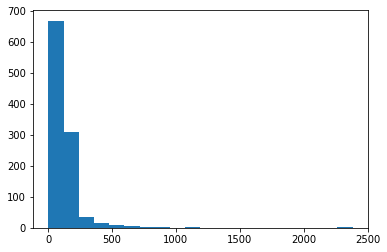



count    1046.000000
mean      125.310552
std       123.480676
min         2.145406
25%        71.394861
50%       102.252261
75%       139.910999
max      2382.969724
dtype: float64


In [130]:
#1.5 Total Factor Productivity estimates--VA version --> The Production Estimate I Selected

VA2=join['VA_2014']

K2=join['K_2014']
L2=join['L_2014']

alpha_hat = result1_4c.params[2]
beta_hat = result1_4a.params[0]

A_6 = VA2/(K2**alpha_hat*L2**beta_hat)

pp.hist(A1,20) # The second argument sets the number of bins
pp.show()
print('\n')
print(A1.describe(percentiles=[0.25, 0.50, 0.75]))

As I infered above, productivity of the firm varies dramatically from minimum value of 2 to maximum value of 2382, which indicates that the largers firm is roughly 1000 times more productive than the minimum firm, it can be due to the returns to scale, firm size, technological advance. By looking at the histogram and the summary statistics, the distribution is definitely right skewed which indicates that the there exists outlier firms with high productivity that to increase the average productivity of distribution. 

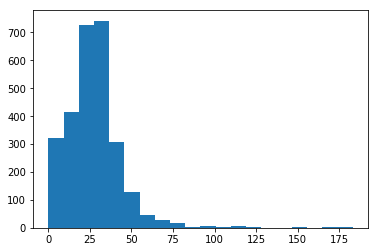



count    2759.000000
mean       27.461583
std        17.247889
min         0.013399
25%        17.589905
50%        26.730874
75%        34.642085
max       183.053755
dtype: float64


In [131]:
#1.5 Total Factor Productivity estimates--CD version just for comparison #1.2 OLS
Y=df14['Y']

K=df14['K']
L=df14['L']
M=df14['M']

a=result2.params[1]
b=result2.params[2]
r=result2.params[3]

A_12 = Y/(K**a*L**b*M**r)

pp.hist(A,20) # The second argument sets the number of bins
pp.show()
print('\n')
print(A.describe(percentiles=[0.25, 0.50, 0.75]))

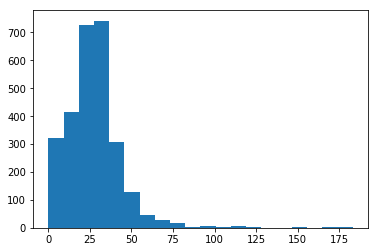



count    2759.000000
mean       27.461583
std        17.247889
min         0.013399
25%        17.589905
50%        26.730874
75%        34.642085
max       183.053755
dtype: float64


In [132]:
#result from 1.3

Y=df1314['Y']

K=df1314['K']
L=df1314['L']
M=df1314['M']

#Using OLS with dummy variables included production function estimates
a=resultd1.params[1]
b=resultd1.params[2]
r=resultd1.params[3]

A_13 = Y/(K**a*L**b*M**r)

pp.hist(A,20) # The second argument sets the number of bins
pp.show()
print('\n')
print(A.describe(percentiles=[0.25, 0.50, 0.75]))

It shows the productivity distributions of the firms with different estimate from the models that we used previously. 

Problem 1.6

Let ${S}_t = {Y}_t/E[{Y}_t]$
Show that $E[{S}_t{A}_t] = E[{S}_t]E[{A}_t]+C({S}_t,{A}_t)$ 
                         = $E[{A}_t]$+${\beta}$$V({A}_t)$,
                          
             
Since
$C({S}_t,{A}_t) = E[{S}_t{A}_t] - E[{S}_t]E[{A}_t]$, the first identity is trivial from adding $E[{S}_t]E[{A}_t]$ on to both side  

given that ${S}_t = {Y}_t/E[{Y}_t]$, 
$E[{S}_t] = E[{Y}_t/E[{Y}_t]] = E[{Y}_t]/E[{Y}_t] = 1$, which implies $E[{S}_t]E[{A}_t]=E[{A}_t]$

${\beta}$ = $C({S}_t,{A}_t)$/$V({A}_t)$,  

$C({S}_t,{A}_t)$ = ${\beta}$$V({A}_t)$

Therefore, $E[{S}_t]E[{A}_t]+C({S}_t,{A}_t)$ = $E[{A}_t]$+${\beta}$$V({A}_t)$, as desired

From the identity above, $E[{S}_t{A}_t] = E[{A}_t] + C[{S}_t,{A}_t]$. In this case, ${S}_t$ represent the relative firm size by sale which we can infer that the average relative productivity of firms of with different size can be determined by adding $cov(S, {A}_t)$ to the the average productivity of all firms. This implies that the case of zero covariance, $E[{S}_t{A}_t]$ = $E[{A}_t]$, the average productivity is identical considering the firms sizes. Also the case of positive covariance, then the average relative productivity for large size firms will be greater than the productivity of each firm. 

In [133]:
VA = join['VA_2014']
S = VA/np.mean(VA)

olsW=sm.OLS(S, A_6).fit(cov_type="HC0")
olsW.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                VA_2014   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     26.36
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           3.38e-07
Time:                        17:01:15   Log-Likelihood:                -2525.3
No. Observations:                1046   AIC:                             5053.
Df Residuals:                    1045   BIC:                             5058.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0103      0.002      5.134      0.000       0.006       0.014
==============================================================================
Omnibus:                     1328.591   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           214937.738
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      71.982   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

1.7 Summarizing your analysis of this dataset 

Measuring the Productivity of firm is a major challenge and also controversial. In this Problem set, we used three different method to estimate firm's productivity. Cross-sectional regression, Panel regression, and Proxy variable regression. Before we moved into the measuring process, we used summary statstics and grouping method to not only organize the data set which focusing on certain years or matching the number of observations, the case of using panel data, also we were able to see the general trend of the manufacturing industry.  

Our main approach of measuring the productivity follow the production function approach, traditional Cobb Douglass production function, with given information of Output, capital, Labor, material expenditure, real valued added by firm, and real investment. With this data set, we estimated for elasticities of output with respect to capital, labor and material expenditure. Each estimation followed specific assumptions/conditions as we discussed in the lecture, and defined the production function with these assumptions in to the regression model. Also we considered the its Returns to scale for Panel production function estimate and regular OLS estimate using the t test of significancy of sum of the coefficients. For Panel prdoction function estimates we failed to reject the null hypothesis of constant retruend to scale and regular OLS estimates we rejected the null hypothesis which implies the change in returns to scale. 

We measured total factor productivity for the part 1.5. Comparing the histogram result of each estimates from three different model, we observe it varys significantly since each model follows different assumptions and different degree of complexity in measuring the productivity. At last, weighting for the size of firms for the productivity, we could obtained the estimate for the relative productivity of the firm in the market with respect to its size. 

Comparing the three different production function models those we used to find the estimates, OLS and First difference(Panel data) require strong assumption which firm's productivity is independent, Constant, from its capital and labor interms of growth rate and the percent change. Proxy variable produciton function estimates followed the more economic intended assumptions relative to previous model such as Conditional uncorrelatedness assumption, Firm's evolution of productivity, and conditional adjustment of K(capital) and L(labor). This is more sophisticated model, potentially including the econmic nature of the firm in accuracy, thus it likely to adjust the problems, biased coeffcient, that we discussed in OLS and panel regression.

In sum, choosing the way to measure the firm's unobserved productivity need to be done in careful manner, each of the model follows specific assumptions and should be used in the right context when the assumption is satisfied by the setting. As a researcher/economists we can further make an implication for the exiting studies to adjust or devlope the models that can give more accurate and unbiased estimate in the future. 